## **Variability**
**Author**: Chiara Virzì


This notebook is dedicated to analyzing the variability of a **Young Stellar Object (YSO)** over an observational time span of approximately three months. The goal is to inspect all available data for the selected object during this period in order to identify any spectroscopic variations that may provide insight into the physical processes at play.

We begin by loading and visualizing the full dataset. This will allow us to explore the object's behavior over time and assess the presence and nature of any variability patterns, such as periodic changes, flares, or irregular activity.

Such an analysis is essential for understanding the dynamic environments surrounding YSOs, including accretion processes, disk interactions, and magnetic activity.
The used libraries are the following:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In this cell, we process two sets of spectral data stored in FITS files:

One folder contains spectra with an emission (or absorption) line.

The other contains spectra without the line (e.g., a reference or continuum-only spectrum).

The files in both folders are ordered to match one-to-one. For each pair of spectra, we multiply them element-wise to isolate or emphasize the spectral line by effectively applying the line profile onto a flat reference. This can be useful for studying the line in isolation or enhancing line contrast.

The resulting spectra are: saved as new FITS files in a third output folder and displayed together in a single plot for comparison and analysis.

C:\Users\chiar\AppData\Local\Temp\ipykernel_22452\3001902156.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


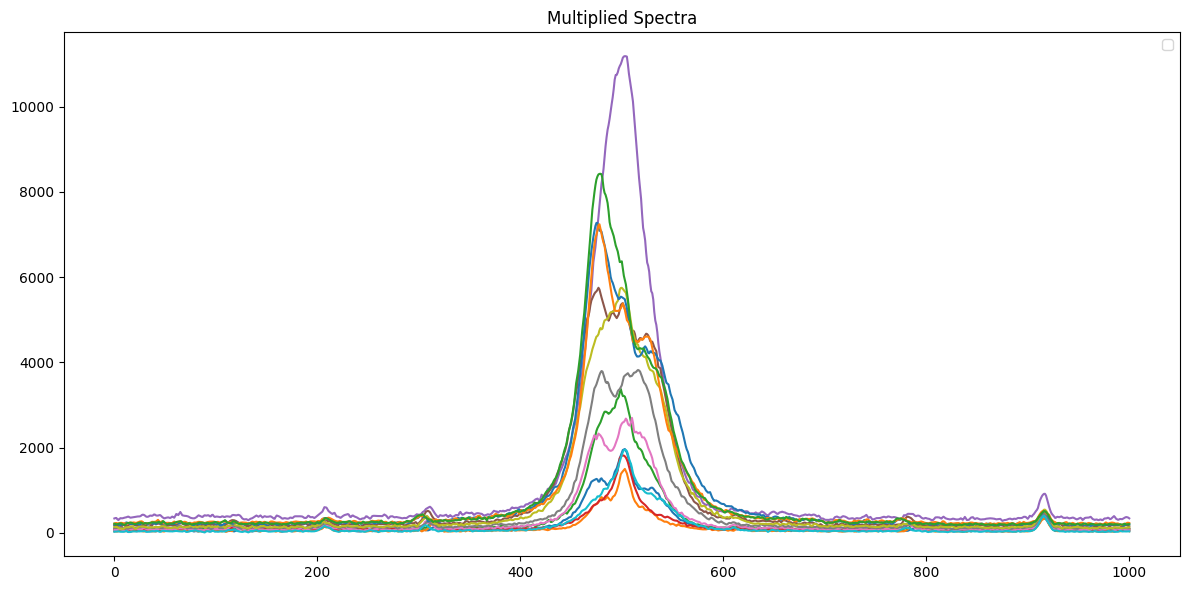

In [ ]:
# Folder paths
folder1 = 'var_cont' 
folder2 = 'var_noline'  
folder_output = 'variability'  # Output folder for the multiplied spectra

# Get and sort the list of FITS files from both folders
file1 = sorted([f for f in os.listdir(folder1) if f.endswith('.fits')])
file2 = sorted([f for f in os.listdir(folder2) if f.endswith('.fits')])

# Check that both folders contain the same number of files
if len(file1) != len(file2):
    raise ValueError("The two folders must contain the same number of FITS files.")

# List to store the multiplied spectra
multiplied_spectra = []

# Loop through file pairs
for name1, name2 in zip(file1, file2):
    path1 = os.path.join(folder1, name1)
    path2 = os.path.join(folder2, name2)

    with fits.open(path1) as hdul1, fits.open(path2) as hdul2:
        data1 = hdul1[0].data
        data2 = hdul2[0].data

        # Assume the spectra are 1D arrays of the same length
        multiplied_data = data1 * data2

        # Save the new multiplied spectrum to a FITS file
        #hdu = fits.PrimaryHDU(multiplied_data)
        #output_path = os.path.join(folder_output, f"multiplied_{name1}")
        #hdu.writeto(output_path, overwrite=True)

        multiplied_spectra.append(multiplied_data)

# Plot all multiplied spectra
plt.figure(figsize=(12, 6))
for i, spectrum in enumerate(multiplied_spectra):
    plt.plot(spectrum)

plt.legend()
plt.tight_layout()
#plt.savefig("all_spectra.png", dpi=300)
plt.show()
